# THE SPARKS FOUNDATION




# Task-2 Prediction using Unsupervised ML

# Predicting the optimum number of clusters and representing it visually

## Author: Akanksha Vaddepalli
    

# Introduction

**K-means** clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The input data are unlabeled (i.e. no labels or classes given) and that the algorithm learns the structure of the data without any assistance. The goal of this algorithm is to find groups in the data and attempt to group similar clusters together in the data.

Importing all the necessary libraries

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [5]:
## Importing the dataset
dataset = pd.read_csv("Irisi.csv", index_col=0)

In [6]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
set(dataset.Species.values) 

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [9]:
#summary of statistics
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#checking for null values
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
## dropping ALL duplicte values
dataset.drop_duplicates(inplace=True)

For data visualization Seaborn library is used. This provides a high-level interface for drawing attractive and informative statistical graphics.

In [15]:
# using all the variable for visualisation
#iloc function enables to select a particular cell of the dataset
X = dataset.iloc[:, [0,1,2, 3]].values 

## Elbow Method
The **elbow method** is used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [21]:
# Using the elbow method to find the optimal number of clusters
wcss = []

#this loop will fit the k-means algorithm to data and 
#will compute the within cluster sum of squares and
#appended to wcss list

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    
#max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. 
#the default value of 300 is entered.
#Random state ensures that the splits generated are reproducible 
#This ensures that the random numbers are generated in the same order.

    kmeans.fit(X) ##kmeans algorithm fits to the X dataset
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

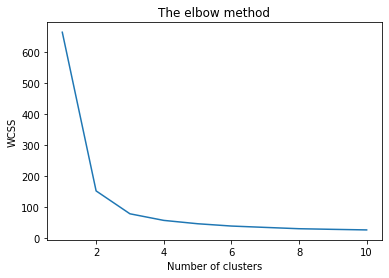

In [17]:
# Plotting the results onto a line graph, 
# let's observe "The elbow" method

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

To determine the optimal number of clusters, the value of k at the elbow is selected i.e. the point after which the distortion start decreasing in a linear fashion. Thus form the above graph, it can be said that the optimum clusters the data is 3.

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

* The **cluster center** is the arithmetic mean of all the points belonging to the cluster.
* Each point is **closer to its own cluster center** than to other cluster centers.

In [22]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

#k-means++: selects initial cluster centers for k-mean clustering in a smart way to speed up 
#random: choose n_clusters observations (rows) at random from data for the initial centroid


The fit predict method is used that returns for each observation which cluster it belongs to. The cluster to which client belongs and it will return this cluster numbers into a single vector that is  called y_kmeans

In [23]:
y_kmeans = kmeans.fit_predict(X)

## Visualisation of Data 

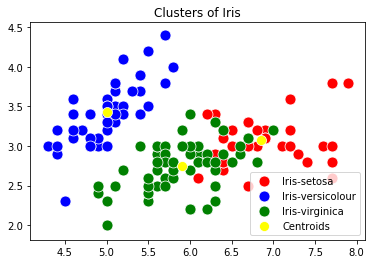

In [20]:
#visualising the data
import seaborn as sns
#plt.figure(figsize=(9,5))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'red', label = 'Iris-setosa',s=120)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Iris-versicolour',s=120)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Iris-virginica',s=120)

## Plotting the centroids of the clusters
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'yellow', 
                label = 'Centroids',s=100)
plt.grid(False)
plt.title('Clusters of Iris')
plt.legend()
plt.show()